In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [9]:
df = pd.read_csv('C:/Users/balac/Downloads/Sample Media Spend Data.csv')

# Pandas taglia il numero di cifre mostrate e voglio quindi ridurle nella visualizzazione.

df.style.format({col: "{:.2f}" for col in df.select_dtypes(include='number').columns})
df.head(5)

,Division,Calendar_Week,Paid_Views,Organic_Views,Google_Impressions,Email_Impressions,Facebook_Impressions,Affiliate_Impressions,Overall_Views,Sales
0,A,1/6/2018,392,422,408,349895.0107,73580,12072,682,59417
1,A,1/13/2018,787,904,110,506270.2176,11804,9499,853,56806
2,A,1/20/2018,81,970,742,430042.1538,52232,17048,759,48715
3,A,1/27/2018,25,575,65,417745.6658,78640,10207,942,72047
4,A,2/3/2018,565,284,295,408505.8012,40561,5834,658,56235


Questo dataset mostra quindi le impressions per ogni canale a cadenza settimanale.
<br> Iniziamo col verificare che non ci siano valori nulli nel dataset.

In [14]:
missing_values = df.isnull().sum()
print(missing_values)

Division                 0
Calendar_Week            0
Paid_Views               0
Organic_Views            0
Google_Impressions       0
Email_Impressions        0
Facebook_Impressions     0
Affiliate_Impressions    0
Overall_Views            0
Sales                    0
dtype: int64


Non dovendo fare nessun tipo di data cleaning, per una panoramica migliore è utile raggruppare le impression per anno.

In [17]:
df['year'] = df['Calendar_Week'].str[-4:]
df_grouped = df.groupby('year')[['Paid_Views', 'Organic_Views', 'Google_Impressions', 
                                 'Email_Impressions', 'Facebook_Impressions', 'Affiliate_Impressions', 'Sales']].sum()
df_grouped

,Paid_Views,Organic_Views,Google_Impressions,Email_Impressions,Facebook_Impressions,Affiliate_Impressions,Sales
year,,,,,,,
2018,3178323,2108887,1021849563,1.111156e+09,250071734,36390020,247357254
2019,34517944,29919423,1502113795,1.009303e+09,506208855,29390984,277286137
2020,8355349,8719849,179753000,1.998553e+08,64825546,4120160,42541770


Il dataset comprende quindi un periodo compreso tra il 2018 e il 2020.<br>
Il 2019 è stato l'anno con le impressions maggiori, fatta eccezione per le affiliate durante il 2018.<br>
Tuttavia, le vendite complessive del 2019 sono leggermente superiori rispetto al 2018.<br><br>
È quindi opportuno creare una nuova visualizzazione che tenga conto sia dell'anno che dei mesi per ottenere maggiori informazioni.

In [20]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3051 entries, 0 to 3050
Data columns (total 11 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Division               3051 non-null   object 
 1   Calendar_Week          3051 non-null   object 
 2   Paid_Views             3051 non-null   int64  
 3   Organic_Views          3051 non-null   int64  
 4   Google_Impressions     3051 non-null   int64  
 5   Email_Impressions      3051 non-null   float64
 6   Facebook_Impressions   3051 non-null   int64  
 7   Affiliate_Impressions  3051 non-null   int64  
 8   Overall_Views          3051 non-null   int64  
 9   Sales                  3051 non-null   int64  
 10  year                   3051 non-null   object 
dtypes: float64(1), int64(7), object(3)
memory usage: 262.3+ KB


Dato che la colonna delle date è in formato stringa, per estrarre anno e mese è stata convertita nel formato data e periodo.<br>
Anche la colonna year è stata convertita in formato float per poterla riutilizzare meglio in seguito.

In [23]:
df['year'] = df['year'].astype(float)

df['Calendar_Week'] = pd.to_datetime(df['Calendar_Week'], format='%m/%d/%Y')
df['Month-Year'] = df['Calendar_Week'].dt.strftime('%m-%Y')
df['Month-Year'] = df['Calendar_Week'].dt.to_period('M')

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3051 entries, 0 to 3050
Data columns (total 12 columns):
 #   Column                 Non-Null Count  Dtype         
---  ------                 --------------  -----         
 0   Division               3051 non-null   object        
 1   Calendar_Week          3051 non-null   datetime64[ns]
 2   Paid_Views             3051 non-null   int64         
 3   Organic_Views          3051 non-null   int64         
 4   Google_Impressions     3051 non-null   int64         
 5   Email_Impressions      3051 non-null   float64       
 6   Facebook_Impressions   3051 non-null   int64         
 7   Affiliate_Impressions  3051 non-null   int64         
 8   Overall_Views          3051 non-null   int64         
 9   Sales                  3051 non-null   int64         
 10  year                   3051 non-null   float64       
 11  Month-Year             3051 non-null   period[M]     
dtypes: datetime64[ns](1), float64(2), int64(7), object(1), period[

In [36]:
df_filtered = df[df['Month-Year'].dt.year != 2020]

df_mese_anno = df_filtered.groupby('Month-Year')[['Paid_Views', 'Organic_Views', 'Google_Impressions', 'Email_Impressions',
                                   'Facebook_Impressions', 'Affiliate_Impressions', 'Sales']].sum().sort_values(by='Month-Year', ascending=True)

df_mese_anno

,Paid_Views,Organic_Views,Google_Impressions,Email_Impressions,Facebook_Impressions,Affiliate_Impressions,Sales
Month-Year,,,,,,,
2018-01,50168,52147,57701,8.987378e+07,10200384,4027214,12333156
2018-02,54256,50612,52905,1.071975e+08,9068217,2884808,14206872
2018-03,68953,63672,69741,1.166840e+08,9079614,4094162,17872678
2018-04,57977,55283,38656178,9.557564e+07,9933085,3057445,12730619
2018-05,53287,54678,61726719,8.350498e+07,5089644,3008171,13639857
2018-06,72616,73131,60773642,9.574324e+07,11746886,4413035,16867827
2018-07,56835,59982,75788558,7.949896e+07,16497282,3443911,14413897
2018-08,51649,52456,85187107,7.788045e+07,28337043,3151064,15004330
2018-09,69368,69748,145606409,8.620244e+07,51567352,2929201,20213016


È stato creato un grafico a linee per avere una visione migliore dell'andamento delle impressions per canali nel corso dei mesi.

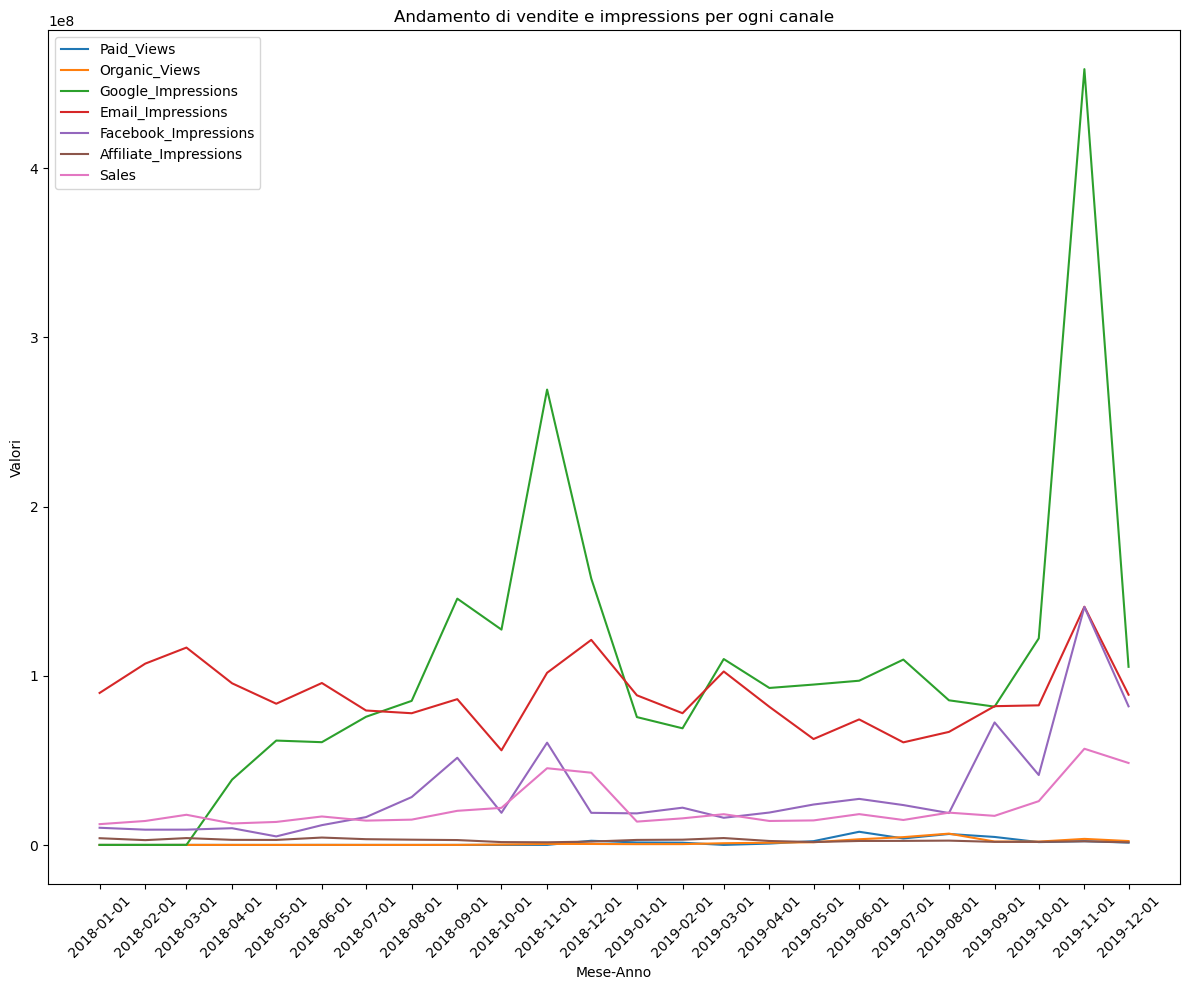

In [38]:
x = df_mese_anno.index.to_timestamp()
channels = ['Paid_Views', 'Organic_Views', 'Google_Impressions', 
            'Email_Impressions', 'Facebook_Impressions', 
            'Affiliate_Impressions', 'Sales']

plt.figure(figsize=(12,10))
for channel in channels:
    plt.plot(x, df_mese_anno[channel], label=channel)
plt.title("Andamento di vendite e impressions per ogni canale")
plt.xlabel('Mese-Anno')
plt.ylabel('Valori')
plt.xticks(x, rotation=45)
plt.legend()
plt.tight_layout()
plt.show()

Dal grafico si deduce che i canali con le maggiori impressions sono stati:<br>
- email, abbastanza stabile nel corso dei due anni oggetto di studio,<br>
- google, pero' con picchi in alcuni mesi,<br>
- anche facebook mostra dei picchi in alcuni periodi.

Per avere una visione migliore delle tendenze è stato creato un grafico a barre con solo i canali email, google, facebook e le vendite.

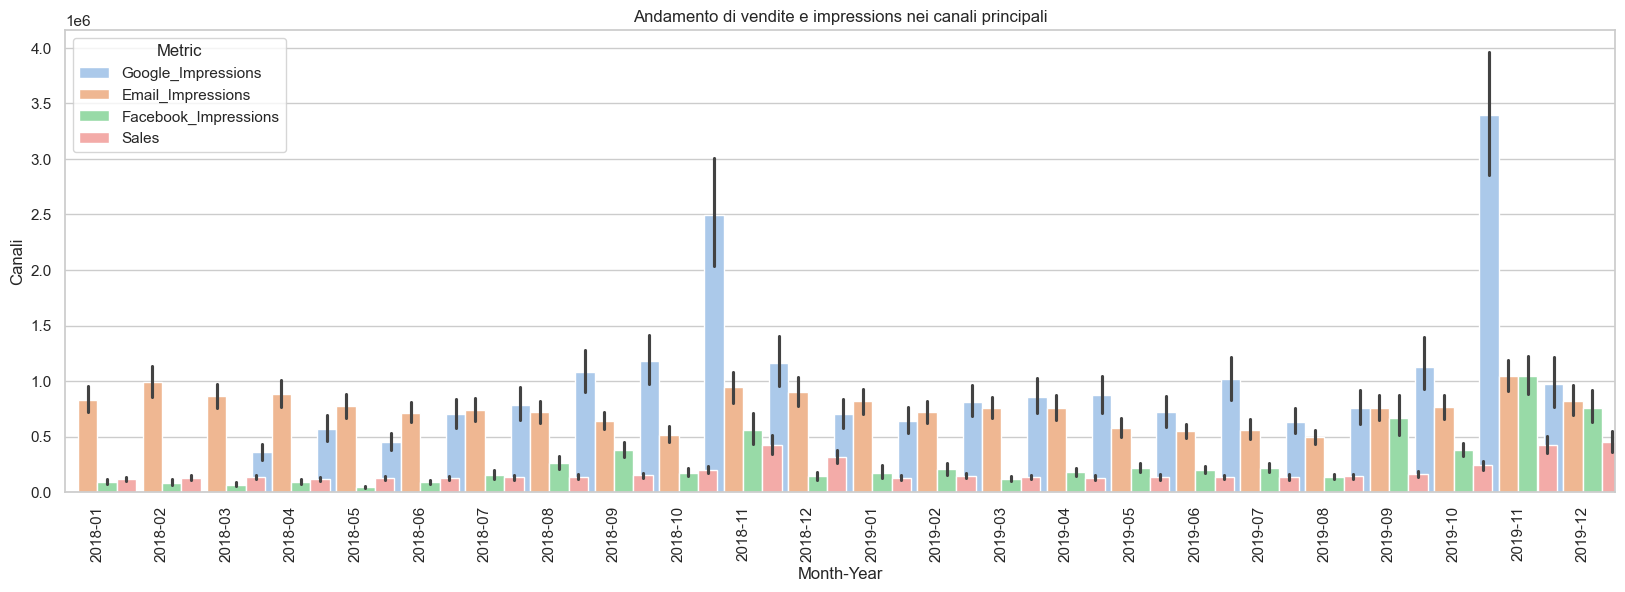

In [65]:
df_melted = pd.melt(df_filtered, id_vars=['Month-Year'], 
                    value_vars=['Google_Impressions', 'Email_Impressions', 'Facebook_Impressions', 'Sales'], 
                    var_name='Metric', value_name='Canali')

plt.figure(figsize = (20, 6)) 
sns.set_theme(style="whitegrid")
sns.set_color_codes("pastel")
sns.barplot(x="Month-Year", y="Canali", hue="Metric", data=df_melted, palette="pastel", width=1.2)
plt.title("Andamento di vendite e impressions nei canali principali")
plt.xticks(rotation=90)
plt.show()

Dal grafico si deduce che le impressions maggiori si sono verificate a novembre in entrambi gli anni per google.<br>
Il dato più stabile è quello delle email_impressions durante il corso di tutti i mesi.

Per avere una visione più chiara dell'andamento delle vendite in base alle impression, è stato calcolato il coefficiente di correlazione tra ciascun canale e vendite.

In [40]:
pivot_df = df_filtered[['Sales', 'Paid_Views', 'Organic_Views', 'Google_Impressions', 
                        'Email_Impressions', 'Facebook_Impressions', 'Affiliate_Impressions']]
correlation = pivot_df.corr()
print(correlation['Sales'].sort_values(ascending=False))

Sales                    1.000000
Google_Impressions       0.783392
Email_Impressions        0.768416
Facebook_Impressions     0.747058
Affiliate_Impressions    0.424895
Organic_Views            0.379069
Paid_Views               0.263323
Name: Sales, dtype: float64


Questi numeri confermano le conclusioni ricavate tramite il grafico a barre precedente.<br>
I canali email, google, facebook sono infatti quelli con il coefficiente di correlazione più alto.

È stata quindi rappresentata anche la correlazione tra le impressions complessive e le vendite.

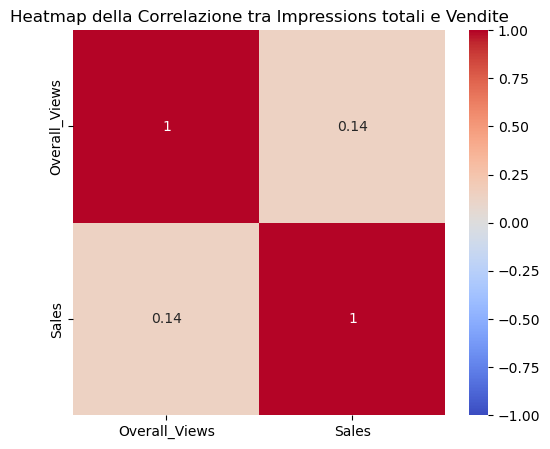

In [42]:
df_complessivo = df_filtered.groupby('Month-Year')[['Overall_Views', 'Sales']].sum().sort_values(by='Month-Year', ascending=True)

corr_matrix = df_complessivo[['Overall_Views', 'Sales']].corr()
plt.figure(figsize=(6, 5))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', vmin=-1, vmax=1, center=0, cbar=True)
plt.title("Heatmap della Correlazione tra Impressions totali e Vendite")
plt.show()

Il grafico mostra una correlazione molto debole tra i due valori e non direttamente proporzionale.

È stato quindi creato un grafico a dispersione che tiene anche conto della correlazione delle impression totali e vendite nel corso dei mesi e anni.

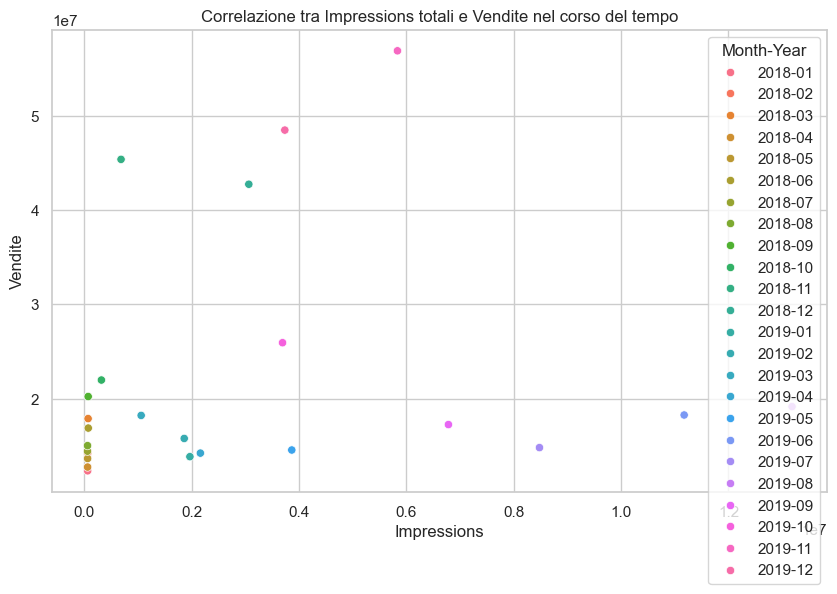

In [47]:
df_complessivo = df_filtered.groupby('Month-Year')[['Overall_Views', 'Sales']].sum().sort_values(by='Month-Year', ascending=True)

plt.figure(figsize=(10, 6))
sns.scatterplot(data=df_complessivo, x='Overall_Views', y='Sales', hue='Month-Year')
plt.title('Correlazione tra Impressions totali e Vendite nel corso del tempo')
plt.xlabel('Impressions')
plt.ylabel('Vendite')
plt.show()

Il grafico non mostra nessuna correlazione nemmeno nel corso dei 2 anni oggetto di studio.<br>
Occorre quindi proseguire l'analisi in modo più mirato sui singoli canali.<br>
Andando a riprendere il dataset riordinato in base a mese e anno, gli indici di correlazione mostrano che:

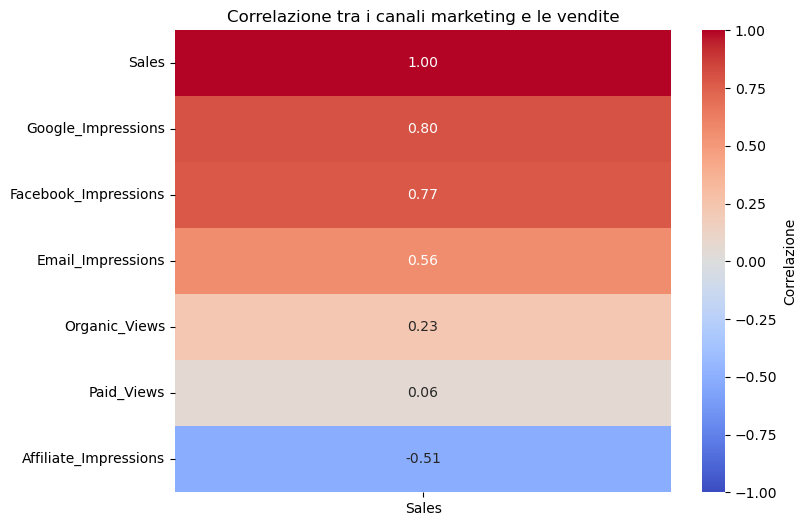

In [49]:
df_heatmap = df_filtered.groupby('Month-Year')[['Paid_Views', 'Organic_Views', 'Google_Impressions', 
                                                  'Email_Impressions', 'Facebook_Impressions', 
                                                  'Affiliate_Impressions', 'Sales']].sum().sort_values(by='Month-Year', ascending=True)

correlation_matrix = df_mese_anno.corr()

correlation_matrix = correlation_matrix[['Sales']].sort_values(by='Sales', ascending=False)

plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', vmin=-1, vmax=1, center=0, 
            cbar_kws={'label': 'Correlazione'}, fmt='.2f')
plt.title('Correlazione tra i canali marketing e le vendite')
plt.show()


le impressions delle affiliate hanno avuto il riscontro peggiore rispetto alle vendite,<br>
le impressions di google, facebook ed email hanno avuto invece le performance migliori.

A fronte di quest'analisi l'indice di correlazione tra canali e vendite è quindi basso, tuttavia non è detto che vi sia causalità. In mancanza di maggiori informazioni di contesto non è possibile identificare ulteriori fattori determinanti.

<b>PROPOSTA DI STRATEGIA MARKETING DATA-DRIVEN</b>

Dato l'andamento positivo che c'è stato finora, è opportuno concentrarsi soprattutto sui canali email, google e facebook.<br>
Conviene concentrare gli investimenti del canale google nei mesi di ottobre-novembre, dato che sono stati i mesi con più riscontro.<br>
Le newsletters per email hanno avuto un riscontro stabile durante tutto l'anno, quindi è opportuno continuare a inviarle a cadenza settimanale/mensile.<br>
Per quanto riguarda il canale facebook, lo metterei in secondo piano rispetto a google dato che ha avuto meno impatto sulle vendite.<br>
Andrebbe invece rivista totalmente la strategia adottata finora per le affiliates, dato che è l'unico canale con un indice di correlazione negativo rispetto alle vendite.